# Chapter 3 Customer Segmentation - Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd_default_format = pd.options.display.float_format
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data0 = pd.read_csv("./data/Mall_Customers.csv")

In [4]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print(data0.describe().columns)
data0.describe()

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [7]:
# Renaming Columgs for convenience
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Traditional segmentation

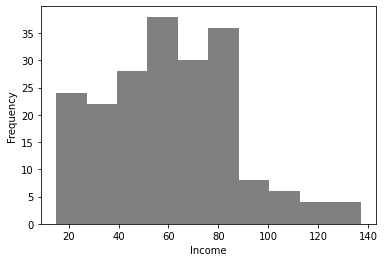

In [8]:
data0.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

In [9]:
# Add a column indicating ranges of income
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                            np.where(data0.Income < 50, \
                            'Low Income', 'Moderate Income'))

data0.groupby(['Cluster'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.00,108.18,13.66,93.00,98.25,103.00,118.25,137.00
Low Income,72.00,33.03,11.09,15.00,22.50,33.50,43.00,49.00
Moderate Income,106.00,69.38,10.65,50.00,61.00,70.00,78.00,88.00


In [10]:
data0.groupby(['Gender', 'Cluster'])['Spend_score'].describe()

count  mean   std   min   25%   50%   75%   max
Gender Cluster                                                         
Female High earners     13.00 52.08 30.78 16.00 24.00 39.00 85.00 91.00
       Low Income       43.00 49.95 25.39  5.00 33.50 50.00 72.50 99.00
       Moderate Income  56.00 52.61 21.71  5.00 41.75 50.00 71.25 95.00
Male   High earners      9.00 51.89 37.21  8.00 15.00 68.00 83.00 97.00
       Low Income       29.00 50.48 25.66  3.00 36.00 55.00 66.00 92.00
       Moderate Income  50.00 46.76 27.79  1.00 21.50 48.00 62.00 97.00

This is informative but there might be other categories and sub-categories we want to explore (age / gender)

# Unsupervised Learning (Clustering) for Customer Segmentation

Let the data speak for itself

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
# First scale the data to its z_score (mean = 0 and std dev = 1) 
# that way all calculations will be in a similar range

cols_to_scale = ['Age', 'Income', 'Spend_score']

# make a copy of the original data
data_scaled = data0.copy()

data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

pd.options.display.float_format = pd_default_format
data_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,1.005000e+02,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.0,-9.603429e-17,1.002509,-1.496335,-0.724844,-0.204535,0.728432,2.235532
Income,200.0,-6.128431e-16,1.002509,-1.738999,-0.727509,0.035879,0.665675,2.917671
Spend_score,200.0,-1.121325e-16,1.002509,-1.910021,-0.599793,-0.007764,0.885132,1.894492


In [13]:
# one way to group customer is by calculating their eucledian distance.
# Think of this as the hypotenuse of the triangle where the customers are represented by the sides

sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [14]:
# and the distance between each pair of points can be calculated with
from scipy.spatial.distance import cdist
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [15]:
# to validate, consider the valies for items 0 and 1
# note that -1.739 -(-1.739) = -1.739+1.739
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

In [16]:
from sklearn.cluster import KMeans
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

#model = KMeans(n_clusters=N, random_stte=random_state)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


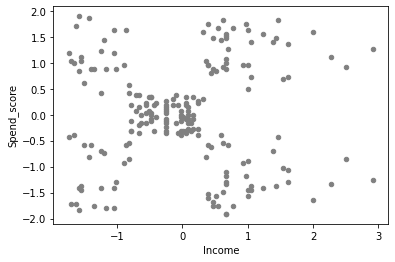

In [17]:
data_scaled.plot.scatter(x='Income', y='Spend_score',color='gray')
plt.show()

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [19]:
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2


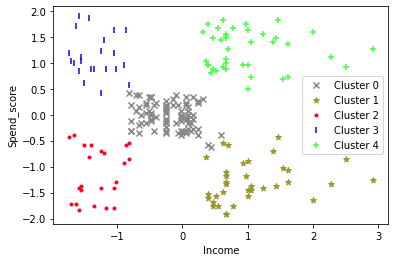

In [20]:
markers = ['x', '*', '.', '|', '+']
marker_color = ['#888888', '#999729', '#FF0022', '#0000FF', '#44FF44']
for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = marker_color[clust],\
                label="Cluster "+str(clust))

plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

In [21]:
# data0[data0['Age'] > 67]['Age']
#
# To be continued...
# Activity 3.01: Bank Customer Segmentation for Loan Campaign
#
# Recall that we copied the data0 dataframe to the data_scaled datarame to perform the analysis
# that resulted in identifying 5 clusters
#

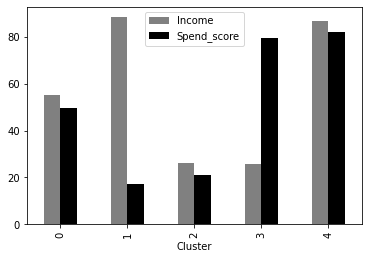

In [28]:
# fold the k-means cluster into the non standarized data so we can compare the clusters
data0['Cluster'] = data_scaled.Cluster

data0.groupby('Cluster')[['Income', 'Spend_score']].mean()\
     .plot.bar(color=['gray','black'])

plt.show()

In [29]:
# it is common to assign 'personas' to each of the cluster

# Bank Customer Segmentation for Loan Campaign

